#Trabajo final- Análisis de ventas de equipos telefónicos
### -Sebastian Jimenez Rosario


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel("/content/drive/MyDrive/1. Base_proyecto.xlsx")
data.head(10)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,margen,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202401,1,Equipo,Celular,Smartphone,Samsung,5. Premium,2126.47,2015.47,111.0,Reno,TIENDAS PROPIAS,TP MEGA PLAZA,LIMA,Tiendas,TIENDAS PROPIAS,Cluster A
1,202401,20,Equipo,Celular,Smartphone,Apple,4. High,1221.14,1110.14,111.0,VR,GRANDES TIENDAS,SAGA,UCAYALI,Retail,GRANDES TIENDAS,Cluster C
2,202401,14,Equipo,Celular,Smartphone,Apple,4. High,1199.08,1079.08,120.0,VR,GRANDES TIENDAS,TOTTUS,SAN MARTIN,Retail,GRANDES TIENDAS,Cluster C
3,202401,27,Equipo,Celular,Smartphone,Xiaomi,4. High,1168.28,994.28,174.0,VR,ISLAS,ISLA,ICA,ISLAS,ISLAS,Cluster A
4,202401,12,Equipo,Celular,Smartphone,Apple,5. Premium,4208.57,4106.57,102.0,VR,Tiendas,LDIAZ4-TE,LIMA,Tiendas,Tiendas Propias,Cluster A
5,202401,5,Equipo,Celular,Smartphone,Xiaomi,3. Mid,846.80,756.80,90.0,VR,MAYORISTAS,MULTIRECARGAS,LIMA,Otros,Mayoristas,Cluster A
6,202401,2,Equipo,Celular,Smartphone,Xiaomi,3. Mid,947.59,770.59,177.0,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
7,202401,20,Equipo,Celular,Smartphone,Xiaomi,3. Mid,1110.73,758.73,352.0,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
8,202401,3,Equipo,Celular,Smartphone,Xiaomi,3. Mid,980.48,751.48,229.0,VR,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
9,202401,30,Equipo,Celular,Smartphone,Xiaomi,4. High,1098.51,982.51,116.0,Reno,TIENDAS PROPIAS FRANQUICIADAS,TPF SJ MIRAFLORES,LIMA,Tiendas,TIENDAS PROPIAS FRANQUICIADAS,Cluster A


#**Nivel basico**


##1.Haga una descripción general de los Datos.

###Información general

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19421 entries, 0 to 19420
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19421 non-null  int64  
 1   Dia           19421 non-null  int64  
 2   EquipoSim     19421 non-null  object 
 3   Tipo          19421 non-null  object 
 4   Subtipo       19421 non-null  object 
 5   Marca         19421 non-null  object 
 6   Gama          19421 non-null  object 
 7   Ingreso       19421 non-null  float64
 8   Costo         19421 non-null  float64
 9   margen        19421 non-null  float64
 10  Tipo Venta    19421 non-null  object 
 11  CanalVenta    19420 non-null  object 
 12  CadenaDealer  16137 non-null  object 
 13  Departamento  19274 non-null  object 
 14  Canal         19421 non-null  object 
 15  SubCanal      19421 non-null  object 
 16  Cluster       19274 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 2.5+ MB


In [ ]:
data.dtypes

Periodo           int64
Dia               int64
EquipoSim        object
Tipo             object
Subtipo          object
Marca            object
Gama             object
Ingreso         float64
Costo           float64
margen          float64
Tipo Venta       object
CanalVenta       object
CadenaDealer     object
Departamento     object
Canal            object
SubCanal         object
Cluster          object
dtype: object

###Cantidad de variables por tipo de datos

In [ ]:
data.dtypes.value_counts()

object     12
float64     3
int64       2
Name: count, dtype: int64

###Cantidad de filas y columnas

In [ ]:
data.shape

(19421, 17)

##2.Realice estadísticas descriptivas para las variables que usted crea conveniente.

### Analizando variables numericas

In [ ]:
data_numerica=data[["Ingreso","Costo","margen"]]
data_numerica.describe()


,Ingreso,Costo,margen
count,19421.000000,19421.000000,19421.000000
mean,522.025775,353.205900,168.819876
std,345.872743,251.914556,157.129466
min,47.656780,30.230000,0.034200
25%,194.067800,157.240000,23.710000
50%,565.780000,338.370000,111.000000
75%,773.410000,547.750000,299.000000
max,4729.580000,4271.580000,1125.119000


### Analizando variables categoricas

In [ ]:
data.describe(include="object")

,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
count,19421,19421,19421,19421,19421,19421,19420,16137,19274,19421,19421,19274
unique,1,2,2,14,5,3,11,475,24,4,11,3
top,Equipo,Celular,Smartphone,Bmobile,2. Entry Smart,Reno,GRANDES TIENDAS,ISLA,LIMA,Retail,GRANDES TIENDAS,Cluster A
freq,19421,19362,19362,4502,6487,10266,13352,1786,10289,13676,13352,11736


###Convertir los datos de la variable tipo en mayúsculas

In [ ]:
data['Tipo'] = data['Tipo'].str.upper()
data.head()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,margen,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202401,1,Equipo,CELULAR,Smartphone,Samsung,5. Premium,2126.47,2015.47,111.0,Reno,TIENDAS PROPIAS,TP MEGA PLAZA,LIMA,Tiendas,TIENDAS PROPIAS,Cluster A
1,202401,20,Equipo,CELULAR,Smartphone,Apple,4. High,1221.14,1110.14,111.0,VR,GRANDES TIENDAS,SAGA,UCAYALI,Retail,GRANDES TIENDAS,Cluster C
2,202401,14,Equipo,CELULAR,Smartphone,Apple,4. High,1199.08,1079.08,120.0,VR,GRANDES TIENDAS,TOTTUS,SAN MARTIN,Retail,GRANDES TIENDAS,Cluster C
3,202401,27,Equipo,CELULAR,Smartphone,Xiaomi,4. High,1168.28,994.28,174.0,VR,ISLAS,ISLA,ICA,ISLAS,ISLAS,Cluster A
4,202401,12,Equipo,CELULAR,Smartphone,Apple,5. Premium,4208.57,4106.57,102.0,VR,Tiendas,LDIAZ4-TE,LIMA,Tiendas,Tiendas Propias,Cluster A


###Convertir los datos de la variable subtipo en mayúsculas

In [ ]:
data['Subtipo'] = data['Subtipo'].str.upper()
data.head()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,margen,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202401,1,Equipo,CELULAR,SMARTPHONE,Samsung,5. Premium,2126.47,2015.47,111.0,Reno,TIENDAS PROPIAS,TP MEGA PLAZA,LIMA,Tiendas,TIENDAS PROPIAS,Cluster A
1,202401,20,Equipo,CELULAR,SMARTPHONE,Apple,4. High,1221.14,1110.14,111.0,VR,GRANDES TIENDAS,SAGA,UCAYALI,Retail,GRANDES TIENDAS,Cluster C
2,202401,14,Equipo,CELULAR,SMARTPHONE,Apple,4. High,1199.08,1079.08,120.0,VR,GRANDES TIENDAS,TOTTUS,SAN MARTIN,Retail,GRANDES TIENDAS,Cluster C
3,202401,27,Equipo,CELULAR,SMARTPHONE,Xiaomi,4. High,1168.28,994.28,174.0,VR,ISLAS,ISLA,ICA,ISLAS,ISLAS,Cluster A
4,202401,12,Equipo,CELULAR,SMARTPHONE,Apple,5. Premium,4208.57,4106.57,102.0,VR,Tiendas,LDIAZ4-TE,LIMA,Tiendas,Tiendas Propias,Cluster A


###Resultado final de estadísticas descriptivas

In [ ]:
data.describe(include=object)

,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
count,19421,19421,19421,19421,19421,19421,19420,16137,19274,19421,19421,19274
unique,1,1,1,14,5,3,11,475,24,4,11,3
top,Equipo,CELULAR,SMARTPHONE,Bmobile,2. Entry Smart,Reno,GRANDES TIENDAS,ISLA,LIMA,Retail,GRANDES TIENDAS,Cluster A
freq,19421,19421,19421,4502,6487,10266,13352,1786,10289,13676,13352,11736


# **Nivel intermedio**

##3.Haga análisis de los Valores Faltantes.

###Identificamos variables con datos nulos

In [ ]:
data.isnull()

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,margen,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19417,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19419,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
data.isnull().any()

Periodo         False
Dia             False
EquipoSim       False
Tipo            False
Subtipo         False
Marca           False
Gama            False
Ingreso         False
Costo           False
margen          False
Tipo Venta      False
CanalVenta       True
CadenaDealer     True
Departamento     True
Canal           False
SubCanal        False
Cluster          True
dtype: bool

### Analizando que variables contienen valores faltantes

In [ ]:
data.isnull().sum()

Periodo            0
Dia                0
EquipoSim          0
Tipo               0
Subtipo            0
Marca              0
Gama               0
Ingreso            0
Costo              0
margen             0
Tipo Venta         0
CanalVenta         1
CadenaDealer    3284
Departamento     147
Canal              0
SubCanal           0
Cluster          147
dtype: int64

###Cantidad de valores nulos

In [ ]:
data.isnull().sum().sum()

3579

###Analizando la proporcion de nulos en un grafico

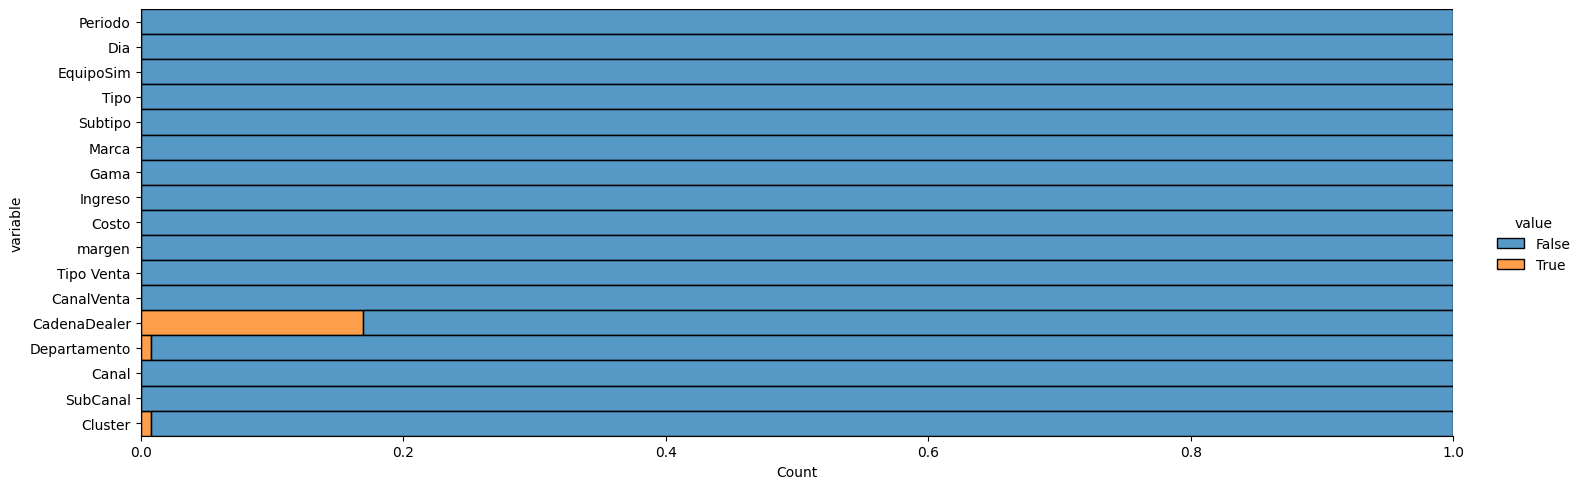

In [ ]:
proporcion_nulos=data.isnull().melt()
sns.displot(data=proporcion_nulos,
            y="variable",
            hue="value",
            multiple="fill",
            aspect=3)

plt.show()

### Eliminamos los valores nulos

In [ ]:
data.head(5)
data.shape
## Eliminamos los valores nulos
new_data=data.dropna()
new_data.shape

(16115, 17)

## 4.Analizando graficos importantes








###Gráfico 1.   Marca de Equipos vs cantidad ventas

In [ ]:
Marca = new_data['Marca'].value_counts()
Marca

Marca
Bmobile     3957
Motorola    3443
Samsung     2926
Xiaomi      2823
ZTE         2352
POCO         198
Alcatel      133
Vivo         105
Azumi         54
Nokia         46
Realme        43
Apple         26
LG             7
Huawei         2
Name: count, dtype: int64

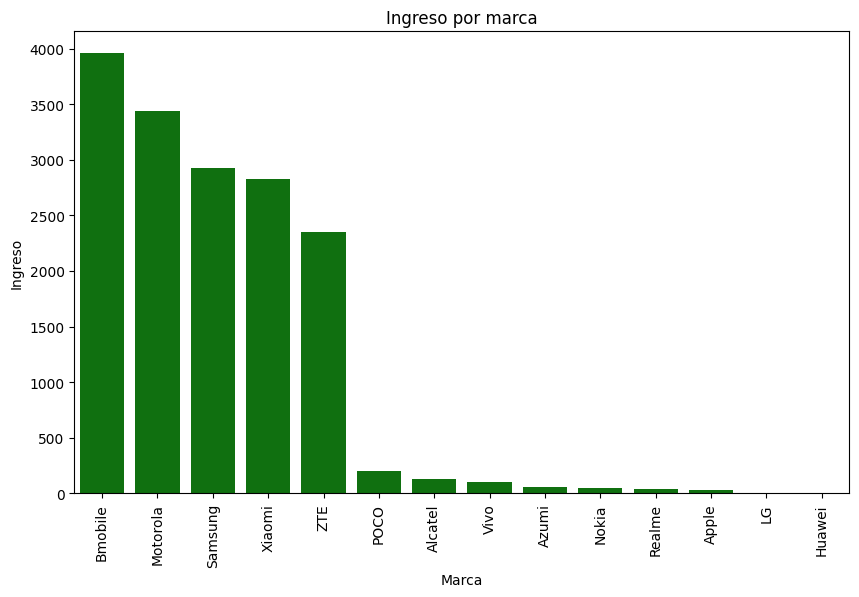

In [ ]:
from pickle import TRUE
Marca=new_data["Marca"].value_counts()
Marca

plt.figure(figsize=(10,6))
plt.title('Ingreso por marca')
plt.xlabel('Marca')
plt.ylabel('Ingreso')
sns.barplot(x=Marca.index,
            y=Marca.values, color="green")
plt.xticks(rotation=90)
plt.bar_labels()
plt.show()





###Gráfico 2.   Canales de ventas vs cantidad ventas



In [ ]:
canales = new_data['CanalVenta'].value_counts()
canales

CanalVenta
GRANDES TIENDAS                  11400
ISLAS                             1989
TIENDAS PROPIAS FRANQUICIADAS     1946
GRANDES TIENDAS ESPECIALISTAS      263
TIENDAS PROPIAS                    261
MAYORISTAS                         131
Otros                               76
Tiendas                             45
CONECTA PLUS                         3
S2S                                  1
Name: count, dtype: int64

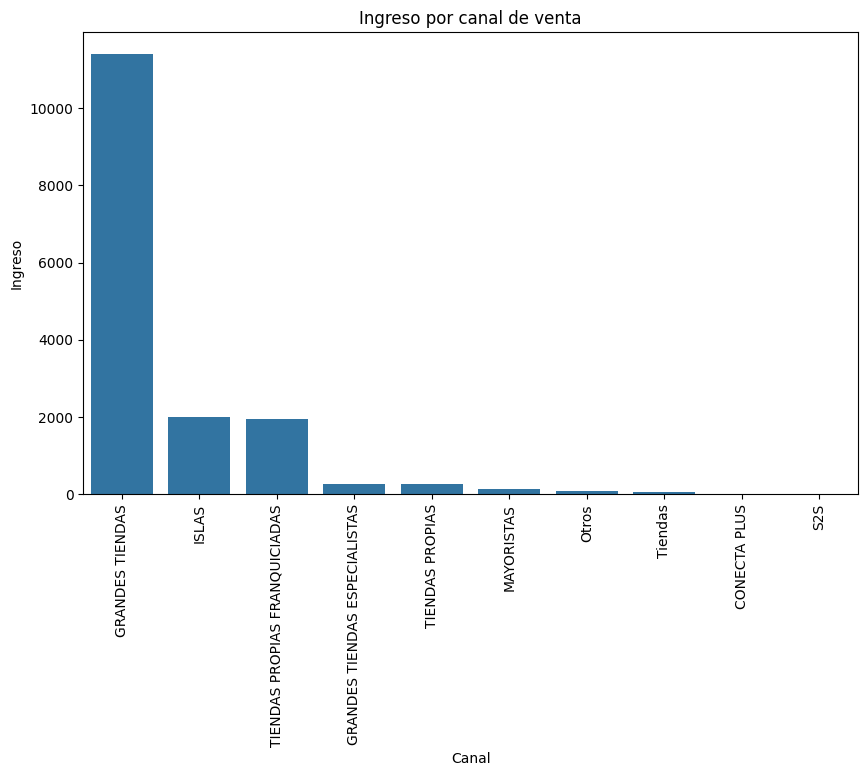

In [ ]:
canales=new_data["CanalVenta"].value_counts()
canales

plt.figure(figsize=(10,6))
plt.title('Ingreso por canal de venta')
plt.xlabel('Canal')
plt.ylabel('Ingreso')
sns.barplot(x=canales.index,
            y=canales.values)
plt.xticks(rotation=90)
plt.show()




###Gráfico 3.   Distribucion de los ingresos





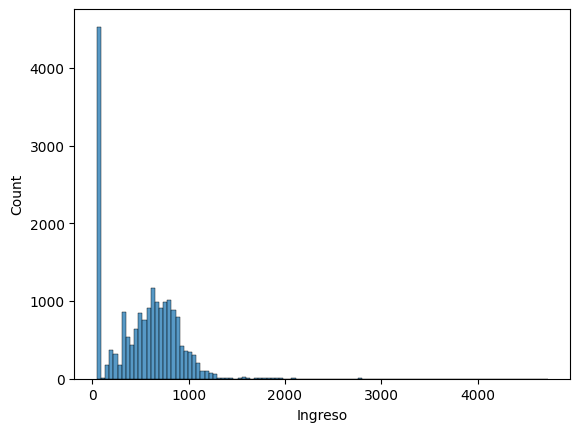

In [ ]:
sns.histplot(x=data['Ingreso'])
plt.show()

###Gráfico 4.   Ingreso vs Costo

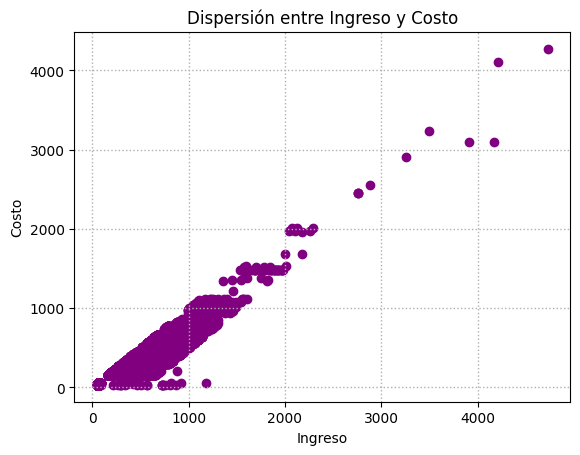

In [ ]:
plt.scatter(data['Ingreso'],data['Costo'], color ='purple')

plt.title('Dispersión entre Ingreso y Costo')

plt.xlabel('Ingreso')
plt.ylabel('Costo')

plt.grid(True, linestyle = ':', linewidth=1)

plt.show()

## 5.Realice un heatmap con las variables Tipo Venta y Marca

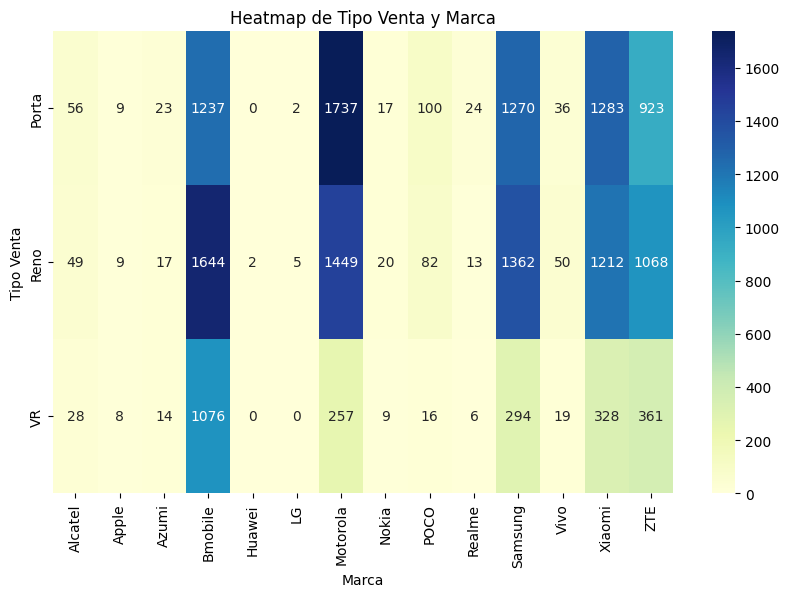

In [ ]:
contingency_table = pd.crosstab(new_data['Tipo Venta'], new_data['Marca'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap de Tipo Venta y Marca')
plt.xlabel('Marca')
plt.ylabel('Tipo Venta')
plt.show()

# **Nivel Data Analyst**

##6.Cluster con más ingresos

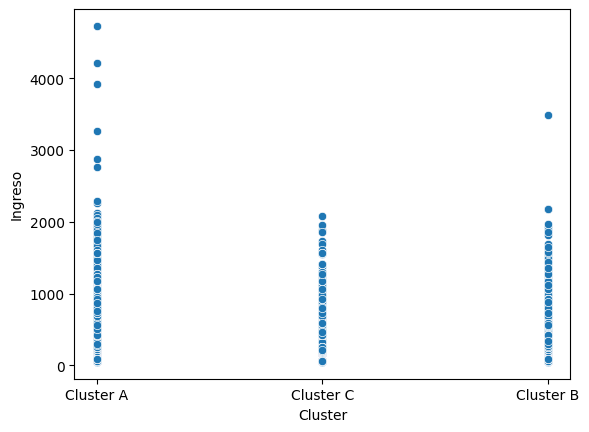

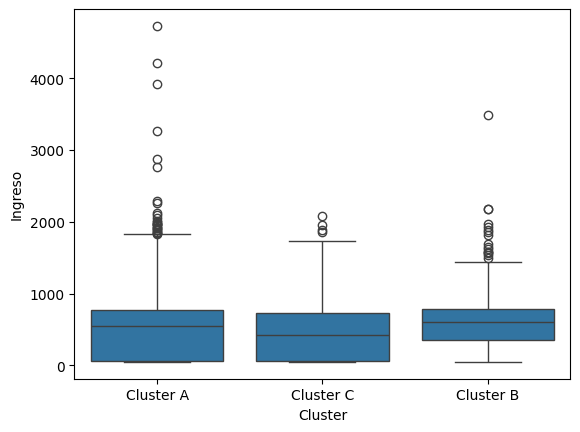

In [ ]:
sns.scatterplot(data=new_data,
               x="Cluster",
               y="Ingreso")
plt.show()
sns.boxplot(data=new_data,
            x="Cluster",
            y="Ingreso")
plt.show()

Cluster
Cluster A    6096839.9
Cluster B    2943297.6
Cluster C    1014518.0
Name: Ingreso, dtype: float64


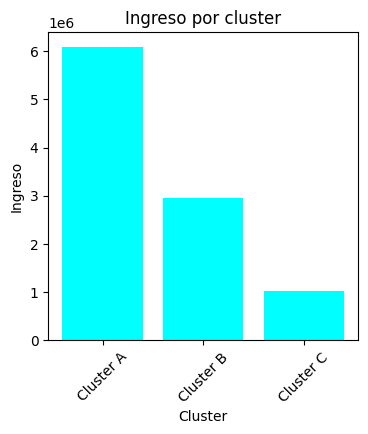

In [ ]:
ingreso = data.groupby('Cluster')['Ingreso'].sum().round(1)
data_clu = ingreso.index
data_val = ingreso.values

print(ingreso)

plt.figure(figsize=(4,4))
plt.bar(data_clu,data_val, color=('cyan'))
plt.title('Ingreso por cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso')

#Quinto 5: Limite de los ejes:
#plt.xlim('minimo','maximo')
#plt.ylim('minimo','maximo')

plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

##7.Canal tiene mayores márgenes

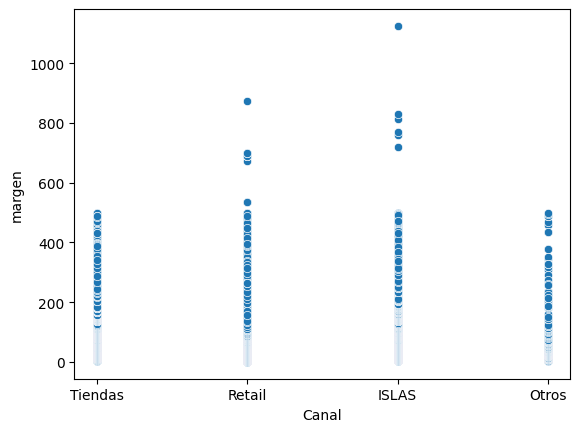

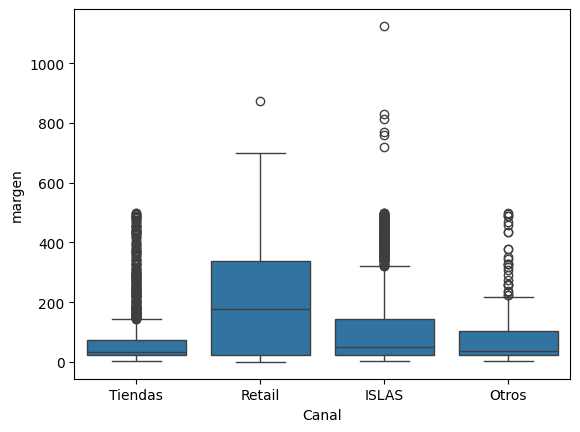

In [ ]:
sns.scatterplot(data=new_data,
               x="Canal",
               y="margen")
plt.show()
sns.boxplot(data=new_data,
            x="Canal",
            y="margen")
plt.show()

Canal
ISLAS       315120.6
Otros        43013.4
Retail     2735414.7
Tiendas     185102.2
Name: margen, dtype: float64


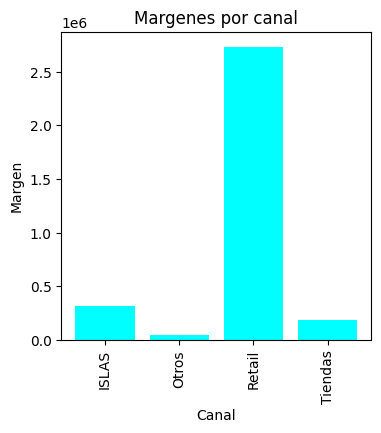

In [ ]:
margen = data.groupby('Canal')['margen'].sum().round(1)
data_can = margen.index
data_val = margen.values

print(margen)

plt.figure(figsize=(4,4))
plt.bar(data_can,data_val, color=('cyan'))
plt.title('Margenes por canal')
plt.xlabel('Canal')
plt.ylabel('Margen')

#Quinto 5: Limite de los ejes:
#plt.xlim('minimo','maximo')
#plt.ylim('minimo','maximo')

plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

##8.Distribución de los márgenes

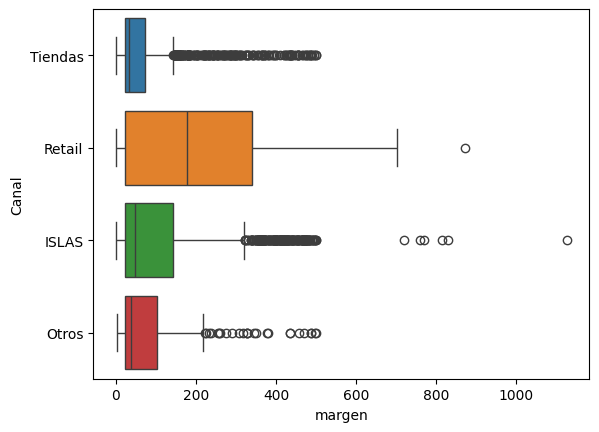

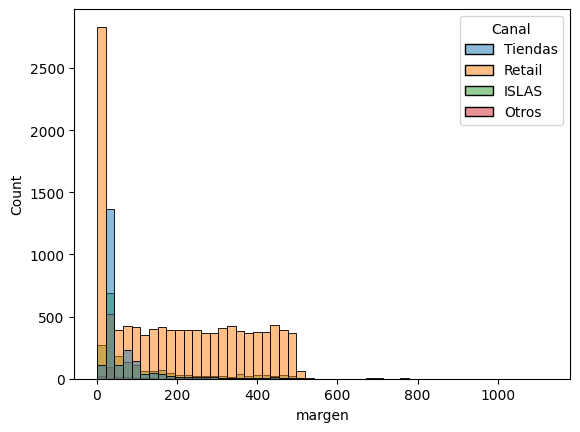

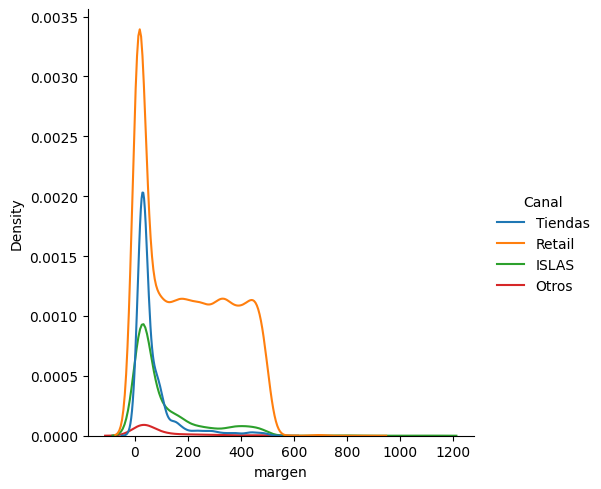

Luego de suavizar el histograma se observa que debido a los atipicos se observa que las distribuciones son asimetricas con cola a la derecha


In [ ]:
sns.boxplot(
    data=new_data,
    x='margen',
    y="Canal",
    hue='Canal'
)
plt.show()
sns.histplot(
    data=new_data,
    x='margen',
    hue='Canal'
)
plt.show()
sns.displot(
    data=new_data,
    x='margen',
    hue='Canal',
    kind="kde"
)
plt.show()

print("Luego de suavizar el histograma se observa que debido a los atipicos se observa que las distribuciones son asimetricas con cola a la derecha")

##9.Mes con mayor margen

In [ ]:
new_data['Periodo']=new_data['Periodo'].astype('object')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16115 entries, 0 to 19420
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       16115 non-null  object 
 1   Dia           16115 non-null  int64  
 2   EquipoSim     16115 non-null  object 
 3   Tipo          16115 non-null  object 
 4   Subtipo       16115 non-null  object 
 5   Marca         16115 non-null  object 
 6   Gama          16115 non-null  object 
 7   Ingreso       16115 non-null  float64
 8   Costo         16115 non-null  float64
 9   margen        16115 non-null  float64
 10  Tipo Venta    16115 non-null  object 
 11  CanalVenta    16115 non-null  object 
 12  CadenaDealer  16115 non-null  object 
 13  Departamento  16115 non-null  object 
 14  Canal         16115 non-null  object 
 15  SubCanal      16115 non-null  object 
 16  Cluster       16115 non-null  object 
dtypes: float64(3), int64(1), object(13)
memory usage: 2.2+ MB


<ipython-input-80-8e10a915cf02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Periodo']=new_data['Periodo'].astype('object')


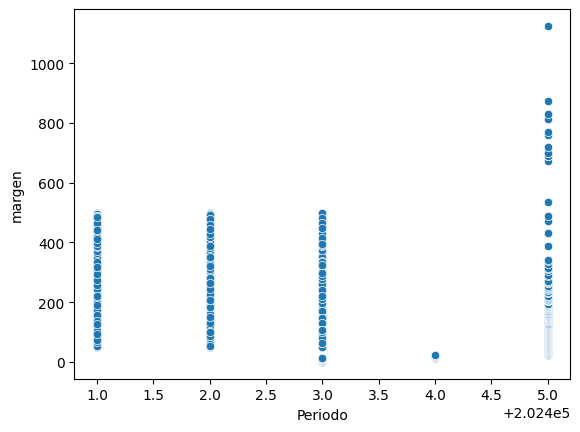

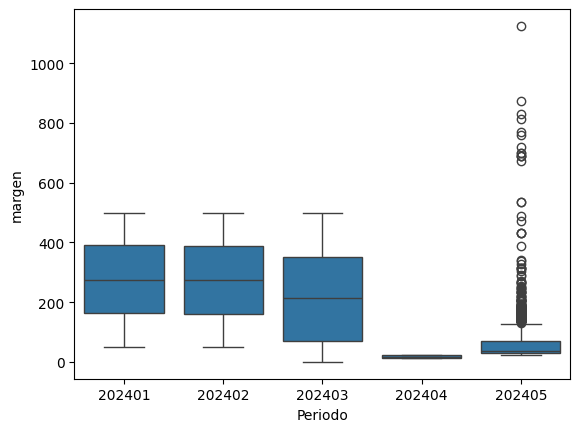

In [ ]:
sns.scatterplot(data=new_data,
               x="Periodo",
               y="margen")
plt.show()
sns.boxplot(data=new_data,
            x="Periodo",
            y="margen")
plt.show()

Periodo
202401    914665.0
202402    779097.0
202403    747474.9
202404     56649.4
202405    192474.1
Name: margen, dtype: float64


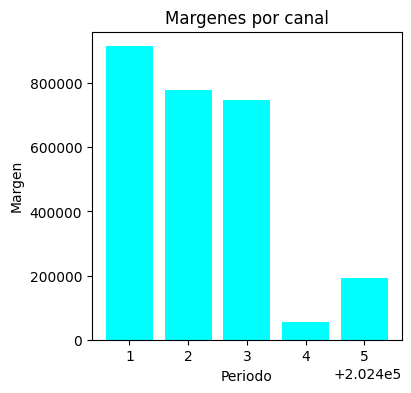

In [ ]:
margen = new_data.groupby('Periodo')['margen'].sum().round(1)
data_can = margen.index
data_val = margen.values

print(margen)

plt.figure(figsize=(4,4))
plt.bar(data_can,data_val, color=('cyan'))
plt.title('Margenes por canal')
plt.xlabel('Periodo')
plt.ylabel('Margen')

#Quinto 5: Limite de los ejes:
#plt.xlim('minimo','maximo')
#plt.ylim('minimo','maximo')

plt.show()

##10.Boxplot de la variable Ingreso y explíquelo a detalle indicando el Promedio, Máximo, Mínimo y Desviación estándar

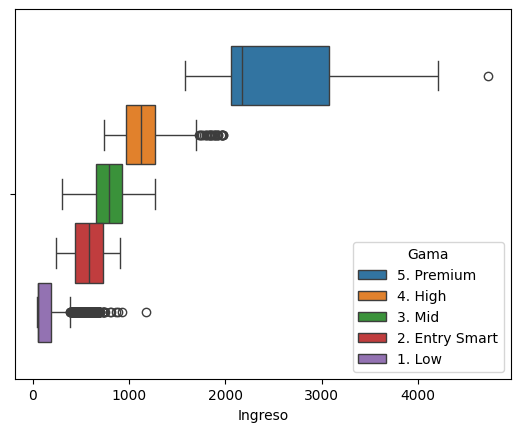

Los estadisticos pedidos son:
                  count         mean         std         min         25%  \
Gama                                                                      
1. Low          5531.0   138.813451  159.755483    47.65678    49.11864   
2. Entry Smart  5238.0   584.312464  170.211454   235.57630   437.39000   
3. Mid          4850.0   795.435308  179.105459   301.82200   659.78000   
4. High          477.0  1167.893275  261.063218   742.86440   970.30000   
5. Premium        19.0  2614.682000  899.704952  1578.24000  2060.96700   

                       50%        75%       max  
Gama                                             
1. Low            58.47458   185.5932  1177.119  
2. Entry Smart   586.27500   727.4500   906.990  
3. Mid           791.65250   926.7100  1269.800  
4. High         1118.33000  1270.3390  1974.350  
5. Premium      2174.70300  3070.7895  4729.580  
La categoria premiun es aquella categoria que mantiene sus ingresos por encima de la mediana 

In [ ]:
import numpy as np

sns.boxplot(data=new_data,
            x="Ingreso",
            hue="Gama")

plt.show()

#estadisticos principales
print("Los estadisticos pedidos son:\n",new_data.groupby('Gama')['Ingreso'].describe())
print("La categoria premiun es aquella categoria que mantiene sus ingresos por encima de la mediana en conclusion los ingresos/por unidad por esa categoria son mayores a las demas categorias.")



# **2da Parte**

In [ ]:
#Importamos las librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Opcion 2 Hacer un group by de meses y un count a la marca de equipos y calcular la proyeccion mensual.


In [ ]:
#Creamos una nueva tabla con respecto a cada mes
venta_mensual=new_data.groupby('Periodo')
venta_mensual.head(5)


,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,margen,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202401,1,Equipo,Celular,Smartphone,Samsung,5. Premium,2126.47000,2015.47,111.00000,Reno,TIENDAS PROPIAS,TP MEGA PLAZA,LIMA,Tiendas,TIENDAS PROPIAS,Cluster A
1,202401,20,Equipo,Celular,Smartphone,Apple,4. High,1221.14000,1110.14,111.00000,VR,GRANDES TIENDAS,SAGA,UCAYALI,Retail,GRANDES TIENDAS,Cluster C
2,202401,14,Equipo,Celular,Smartphone,Apple,4. High,1199.08000,1079.08,120.00000,VR,GRANDES TIENDAS,TOTTUS,SAN MARTIN,Retail,GRANDES TIENDAS,Cluster C
3,202401,27,Equipo,Celular,Smartphone,Xiaomi,4. High,1168.28000,994.28,174.00000,VR,ISLAS,ISLA,ICA,ISLAS,ISLAS,Cluster A
4,202401,12,Equipo,Celular,Smartphone,Apple,5. Premium,4208.57000,4106.57,102.00000,VR,Tiendas,LDIAZ4-TE,LIMA,Tiendas,Tiendas Propias,Cluster A
3935,202402,25,Equipo,Celular,Smartphone,Samsung,3. Mid,1073.56000,628.56,445.00000,Reno,GRANDES TIENDAS,SAGA_ICAQUINDE,ICA,Retail,GRANDES TIENDAS,Cluster A
3936,202402,21,Equipo,Celular,Smartphone,Samsung,3. Mid,1020.16000,635.16,385.00000,Porta,GRANDES TIENDAS,ESTILOS,AREQUIPA,Retail,GRANDES TIENDAS,Cluster B
3937,202402,27,Equipo,Celular,Smartphone,Samsung,4. High,1137.62000,813.62,324.00000,Porta,GRANDES TIENDAS,PLAZAVEA,LIMA,Retail,GRANDES TIENDAS,Cluster A
3938,202402,22,Equipo,Celular,Smartphone,Samsung,3. Mid,780.48000,628.48,152.00000,Reno,GRANDES TIENDAS,SAGA_CHICLAYO,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3940,202402,2,Equipo,Celular,Smartphone,Samsung,3. Mid,1015.11000,629.11,386.00000,Porta,GRANDES TIENDAS,TOTTUS,SAN MARTIN,Retail,GRANDES TIENDAS,Cluster C


###Creamos el nuevo dataframe

In [ ]:
## Analizams la cantidad mensual q se hace de venta
cantidad_venta=venta_mensual['Marca'].count()
cantidad_venta
promedio_venta=venta_mensual['Ingreso'].sum()
promedio_venta
ingreso_mensual=cantidad_venta*promedio_venta
ingreso_mensual
mes=[1,2,3,4,5]
ventas_periodo=pd.DataFrame({"Mes":mes,'Cantidad_venta':cantidad_venta,'Promedio_venta':promedio_venta,'Ingreso_mensual':ingreso_mensual})
ventas_periodo


,Mes,Cantidad_venta,Promedio_venta,Ingreso_mensual
Periodo,,,,
202401,1,3314,2.639812e+06,8.748338e+09
202402,2,2834,2.199387e+06,6.233064e+09
202403,3,3450,1.799941e+06,6.209795e+09
202404,4,3264,3.378151e+05,1.102628e+09
202405,5,3253,1.316076e+06,4.281194e+09


### Creamos el modelo y asignamos las variables

In [ ]:
x=ventas_periodo[['Mes']]
y=ventas_periodo[['Ingreso_mensual']]
modelo_proyeccion=LinearRegression()
modelo_proyeccion.fit(x,y)




LinearRegression()

###Probamos el modelo y agregamos a la tabla

In [ ]:
y_pred=modelo_proyeccion.predict(x)
y_pred
ventas_periodo['Ingresos_proyectado']=y_pred
#ventas_periodo["Ingresos_proyectados"]=ventas_periodo['ventas_proyectado']*ventas_periodo['Promedio_venta']
ventas_periodo

,Mes,Cantidad_venta,Promedio_venta,Ingreso_mensual,Ingresos_proyectado
Periodo,,,,,
202401,1,3314,2.639812e+06,8.748338e+09,8.127949e+09
202402,2,2834,2.199387e+06,6.233064e+09,6.721476e+09
202403,3,3450,1.799941e+06,6.209795e+09,5.315004e+09
202404,4,3264,3.378151e+05,1.102628e+09,3.908532e+09
202405,5,3253,1.316076e+06,4.281194e+09,2.502059e+09


### Coeficientes

In [ ]:

print("Intercepto B0:", modelo_proyeccion.intercept_)
print("Pendiente B1:", modelo_proyeccion.coef_[0])

Intercepto B0: [9.53442085e+09]
Pendiente B1: [-1.40647229e+09]


### Metricas

In [ ]:
print("MSE: Error cuadratico Medio:", mean_squared_error(y, y_pred).round(5))
print("Coeficiente de determinacion (R^2):", r2_score(y, y_pred).round(5))

MSE: Error cuadratico Medio: 2.4924990233773087e+18
Coeficiente de determinacion (R^2): 0.6135


###Grafica

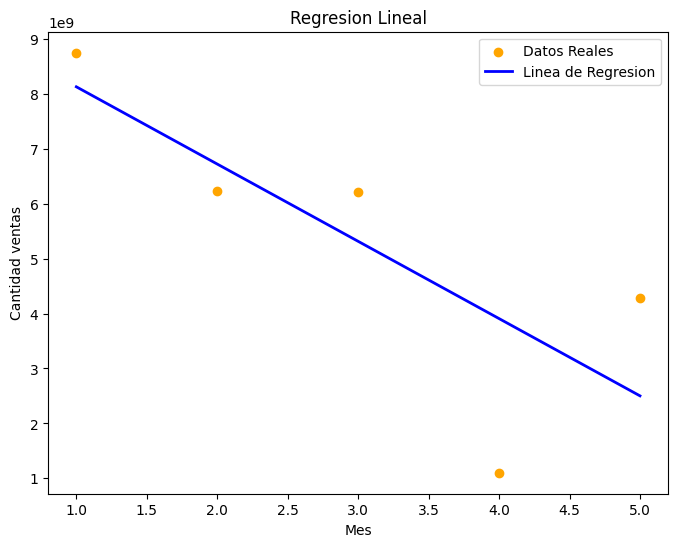

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(x,y, color='orange', label='Datos Reales')
plt.plot(x,y_pred, color='blue', label='Linea de Regresion', linewidth=2)
plt.title('Regresion Lineal')
plt.xlabel('Mes')
plt.ylabel('Cantidad ventas')
plt.legend()
plt.show()

###Proyeccion siguiente mes

In [ ]:
cantidad_predictiva = modelo_proyeccion.predict([[6]])
print("Cantidad de ventas para el siguiente mes:", cantidad_predictiva)

Cantidad de ventas para el siguiente mes: [[1.09558711e+09]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
